<a href="https://colab.research.google.com/github/shlear/MLDM-2022/blob/main/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [2]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:01<00:00, 81.09it/s] 


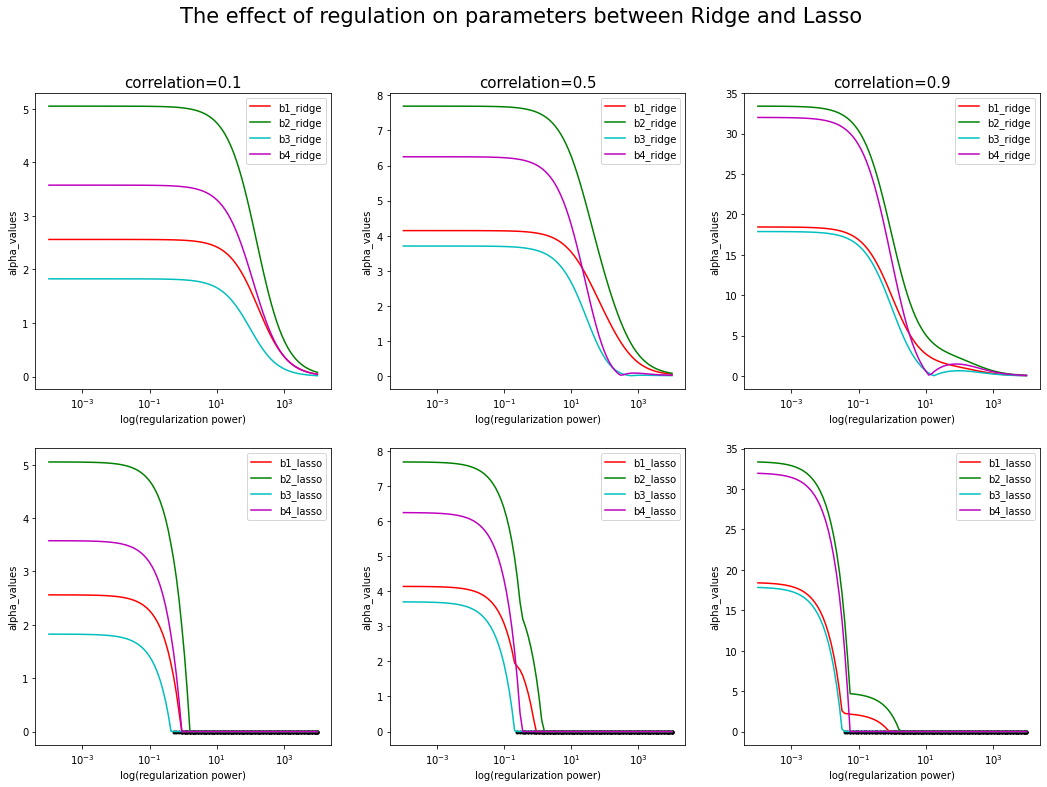

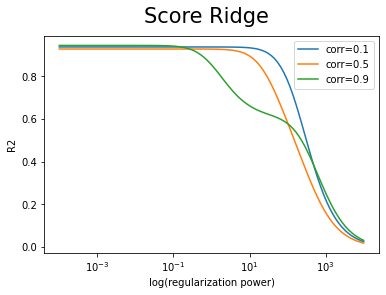

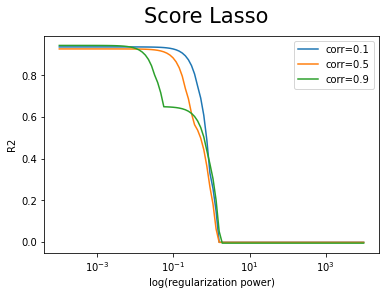

In [3]:
from tqdm import tqdm
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for correlation in [0.1, 0.5, 0.9]:
    # dataset to fit (no need to split into train/test in this task):
    X, y = gen_data(500, correlation)

    # regularization powers:
    alpha_values = np.logspace(-4, 4, 100, base=10)

    # lists to collect models' parameters:
    params_ridge = []
    score_ridge = []
    params_lasso = []
    score_lasso = []
    
    for alpha in tqdm(alpha_values):
        clf_ridge = Ridge(fit_intercept=False, alpha=alpha)
        clf_ridge.fit(X, y)
        score_ridge.append(clf_ridge.score(X, y))
        params_ridge.append(clf_ridge.coef_)
        
        clf_lasso = Lasso(fit_intercept=False, alpha=alpha)
        clf_lasso.fit(X, y)
        score_lasso.append(clf_lasso.score(X, y))
        params_lasso.append(clf_lasso.coef_)
        
    params_ridge = np.array(params_ridge)
    params_lasso = np.array(params_lasso)
    
    plt.figure(1)
    
    plt.subplot(2, 3, [0.1, 0.5, 0.9].index(correlation) + 1)
    plt.title("correlation=" + str(correlation), fontsize=15)
    for ridge, col, label in zip(
        [np.abs(params_ridge[:, :1]), np.abs(params_ridge[:, 1:2]), np.abs(params_ridge[:, 2:3]), np.abs(params_ridge[:, 3:])],
        ["r", "g", "c", "m"],
        ["b1_ridge", "b2_ridge", "b3_ridge", "b4_ridge"]
    ):
        plt.plot(alpha_values, ridge, col, label=label)
        for isclose in range(len(ridge)):
            plt.scatter(alpha_values[isclose], ridge[isclose], c="k", marker=".") if np.isclose(ridge[isclose][0], 0) == True else True
            
    plt.xscale("log")
    plt.xlabel("log(regularization power)")
    plt.ylabel("alpha_values")
    plt.legend()
    
    
    plt.subplot(2, 3, [0.1, 0.5, 0.9].index(correlation) + 4)
    for ridge, col, label in zip(
        [np.abs(params_lasso[:, :1]), np.abs(params_lasso[:, 1:2]), np.abs(params_lasso[:, 2:3]), np.abs(params_lasso[:, 3:])],
        ["r", "g", "c", "m"],
        ["b1_lasso", "b2_lasso", "b3_lasso", "b4_lasso"]
    ):
        plt.plot(alpha_values, ridge, col, label=label)
        for isclose in range(len(ridge)):
            plt.scatter(alpha_values[isclose], ridge[isclose], c="k", marker=".") if np.isclose(ridge[isclose][0], 0) == True else True

    plt.xscale('log')
    plt.xlabel("log(regularization power)")
    plt.ylabel("alpha_values")
    plt.legend()
    plt.suptitle("The effect of regulation on parameters between Ridge and Lasso", fontsize=21)
    
    
    plt.figure(2)
    
    plt.plot(alpha_values, score_ridge, label="corr=" + str(correlation))
    plt.xscale('log')
    plt.xlabel("log(regularization power)")
    plt.ylabel("R2")
    plt.suptitle("Score Ridge", fontsize=21)
    plt.legend()
    
    plt.figure(3)
    
    plt.plot(alpha_values, score_lasso, label="corr=" + str(correlation))
    plt.xscale('log')
    plt.xlabel("log(regularization power)")
    plt.ylabel("R2")
    plt.suptitle("Score Lasso", fontsize=21)
    plt.legend()


plt.legend()
plt.show()